In [1]:
!nvidia-smi

Sun Sep 25 07:24:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    13W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip list

Package                       Version
----------------------------- ----------------------------
absl-py                       1.2.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8

In [3]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('Churn_Modelling.csv',delimiter = ',')
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
redundant_cols = ['RowNumber','CustomerId','Surname']
data = data.drop(columns = redundant_cols)
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [6]:
data.Geography.nunique(), data.Geography.unique()

(3, array(['France', 'Spain', 'Germany'], dtype=object))

In [7]:
data.Gender.nunique(), data.Gender.unique()

(2, array(['Female', 'Male'], dtype=object))

In [8]:
# Encoding Geography
geo_ohe = pd.get_dummies(data.Geography, prefix = 'Geography')
data = pd.concat((data,geo_ohe), axis = 'columns')

In [9]:
# Encoding the Gender column
gen_ohe = pd.get_dummies(data.Gender, prefix = 'Gender')
data = pd.concat((data,gen_ohe), axis = 'columns')

In [10]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0


In [11]:
data = data.drop(columns = ['Geography','Gender'])
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0


In [12]:
# Splitting the data
train, test = train_test_split(data, test_size = 0.2, random_state = 64)

In [13]:
# Scaling the data

# Training data
tr_scaler = MinMaxScaler()
tr_sc = pd.DataFrame(tr_scaler.fit_transform(train), columns = train.columns)
tr_sc.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.442,0.391892,0.7,0.000000,0.333333,0.0,0.0,0.561831,0.0,1.0,0.0,0.0,1.0,0.0
1,0.358,0.216216,0.9,0.000000,0.000000,1.0,1.0,0.466028,0.0,0.0,0.0,1.0,0.0,1.0
2,0.612,0.364865,0.7,0.581644,0.000000,1.0,1.0,0.996998,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
# Testing data
ts_scaler = MinMaxScaler()
ts_sc = pd.DataFrame(ts_scaler.fit_transform(test), columns = test.columns)
ts_sc.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.474,0.587302,0.9,0.000000,0.000000,1.0,0.0,0.322775,0.0,1.0,0.0,0.0,0.0,1.0
1,0.670,0.396825,0.9,0.000000,0.333333,1.0,0.0,0.539040,0.0,0.0,0.0,1.0,0.0,1.0
2,0.884,0.015873,0.7,0.673897,0.000000,1.0,0.0,0.166097,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
tr_x, tr_y = tr_sc.drop(columns = ['Exited']), tr_sc[['Exited']]
ts_x, ts_y = ts_sc.drop(columns = ['Exited']), ts_sc[['Exited']]

In [16]:
tr_x.shape

(8000, 13)

# Building the ANN

# Model Building
1. Initializing the Sequential Contianer
2. Adding the layers {Building the structure of the Neural Network}
3. Compiling the neural network {Describing the optimization and loss functions and the metrics to monitor}

# Model Training
# Model Evaluation
# Model Saving
# Model Loading

In [17]:
# -----------------------------------------------Model Building
# Initializingthe Sequantial container
model = tf.keras.Sequential()

# Adding layers
# ---------Adding the input layer
model.add(tf.keras.layers.Input(shape = (13,)))

# ---------Adding the 1st hidden layer
model.add(tf.keras.layers.Dense(units = 6, 
                                activation = 'relu', 
                                kernel_initializer = 'he_normal'))
# ---------Adding the 2nd hidden layer
model.add(tf.keras.layers.Dense(units = 8, 
                                activation = 'sigmoid', 
                                kernel_initializer = 'glorot_normal'))

# ---------Adding the output layer
model.add(tf.keras.layers.Dense(units = 1, 
                                activation = 'sigmoid', 
                                kernel_initializer = 'glorot_normal'))
# -----------------------------------------------Model Building

# -----------------------------------------------Model Compilation
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Precision','Recall'])
# -----------------------------------------------Model Compilation

In [18]:
# Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Getting the detailed configuration of the model
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 6,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotNormal',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    

In [20]:
# Training the model
logs = model.fit(x = tr_x,
                 y = tr_y,
                 batch_size = 512,
                 epochs = 200,
                 validation_data = (ts_x, ts_y),
                 use_multiprocessing = True,
                 workers = 9)

Epoch 1/200
16/16 [==============================] - 5s 28ms/step - loss: 0.7618 - accuracy: 0.2101 - precision: 0.2058 - recall: 0.9939 - val_loss: 0.7263 - val_accuracy: 0.2580 - val_precision: 0.1953 - val_recall: 0.8929
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6998 - accuracy: 0.4850 - precision: 0.2166 - recall: 0.5751 - val_loss: 0.6698 - val_accuracy: 0.6925 - val_precision: 0.1841 - val_recall: 0.1658
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6502 - accuracy: 0.7511 - precision: 0.2297 - recall: 0.0894 - val_loss: 0.6248 - val_accuracy: 0.8005 - val_precision: 0.2308 - val_recall: 0.0077
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6110 - accuracy: 0.7944 - precision: 0.5000 - recall: 0.0043 - val_loss: 0.5900 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5814 - accuracy: 0.7944 

In [21]:
type(logs)

keras.callbacks.History

In [ ]:
logs.epoch

In [ ]:
logs.history

In [24]:
def vizualiser(history_object, metric):
  epochs = history_object.epoch
  training_metric_data = history_object.history.get(metric)
  validation_metric_data = history_object.history.get(f'val_{metric}')

  plt.figure(figsize = (10,7))
  sns.lineplot(x = epochs, y = training_metric_data)
  sns.lineplot(x = epochs, y = validation_metric_data)
  plt.legend([metric.title(),f'val {metric}'.title()])

  plt.show()

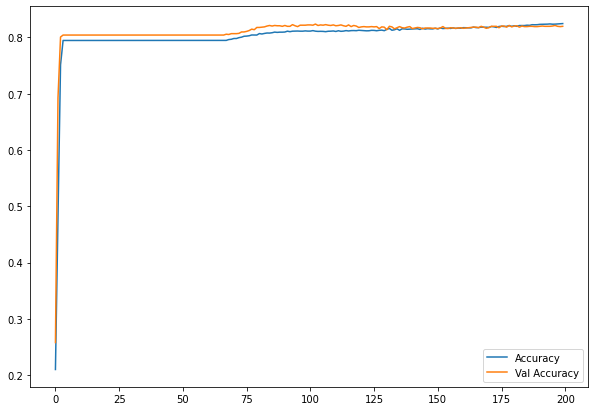

In [25]:
vizualiser(logs,'accuracy')

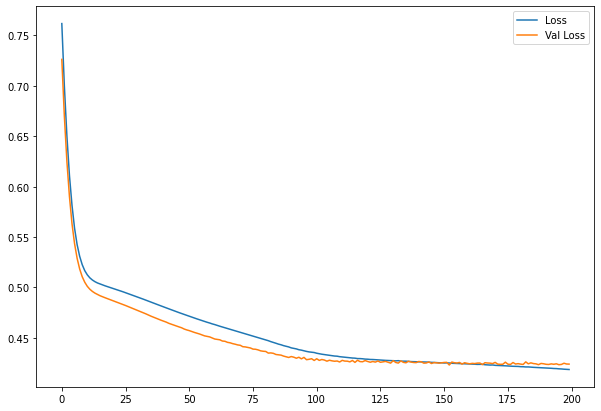

In [26]:
vizualiser(logs,'loss')

# CallBacks

In [ ]:
# 1. Conditional callback
# 2. EarlyStoppping

In [36]:
class ConditionalCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs = {}):
    if (logs.get('accuracy')>=0.8) & (logs.get('val_accuracy')>=0.8):
      print()
      print('Condition satisfied so stopping training !')
      print()
      self.model.stop_training = True

In [37]:
conditional_callback = ConditionalCallback()

In [40]:
# -----------------------------------------------Model Building
# Initializingthe Sequantial container
model1 = tf.keras.Sequential()

# Adding layers
# ---------Adding the input layer
model1.add(tf.keras.layers.Input(shape = (13,)))

# ---------Adding the 1st hidden layer
model1.add(tf.keras.layers.Dense(units = 6, 
                                activation = 'relu', 
                                kernel_initializer = 'he_normal'))
# ---------Adding the 2nd hidden layer
model1.add(tf.keras.layers.Dense(units = 8, 
                                activation = 'sigmoid', 
                                kernel_initializer = 'glorot_normal'))

# ---------Adding the output layer
model1.add(tf.keras.layers.Dense(units = 1, 
                                activation = 'sigmoid', 
                                kernel_initializer = 'glorot_normal'))
# -----------------------------------------------Model Building

# -----------------------------------------------Model Compilation
model1.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Precision','Recall'])
# -----------------------------------------------Model Compilation

In [41]:
# Training the model
logs1 = model1.fit(x = tr_x,
                 y = tr_y,
                 batch_size = 512,
                 epochs = 200,
                 validation_data = (ts_x, ts_y),
                 use_multiprocessing = True,
                 workers = 9,
                 callbacks = [conditional_callback])

Epoch 1/200
16/16 [==============================] - 1s 27ms/step - loss: 0.7585 - accuracy: 0.2069 - precision: 0.2042 - recall: 0.9860 - val_loss: 0.7310 - val_accuracy: 0.2125 - val_precision: 0.1832 - val_recall: 0.8724
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.7129 - accuracy: 0.3319 - precision: 0.1800 - recall: 0.6328 - val_loss: 0.6874 - val_accuracy: 0.5695 - val_precision: 0.1387 - val_recall: 0.2296
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6727 - accuracy: 0.6981 - precision: 0.1375 - recall: 0.0888 - val_loss: 0.6495 - val_accuracy: 0.8000 - val_precision: 0.1000 - val_recall: 0.0026
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6381 - accuracy: 0.7943 - precision: 0.3333 - recall: 6.0790e-04 - val_loss: 0.6166 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6083 - accuracy: 0.7

In [42]:
logs1.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98]

In [44]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stopper = EarlyStopping(monitor = 'loss', patience = 20)

In [46]:
# -----------------------------------------------Model Building
# Initializingthe Sequantial container
model2 = tf.keras.Sequential()

# Adding layers
# ---------Adding the input layer
model2.add(tf.keras.layers.Input(shape = (13,)))

# ---------Adding the 1st hidden layer
model2.add(tf.keras.layers.Dense(units = 6, 
                                activation = 'relu', 
                                kernel_initializer = 'he_normal'))
# ---------Adding the 2nd hidden layer
model2.add(tf.keras.layers.Dense(units = 8, 
                                activation = 'sigmoid', 
                                kernel_initializer = 'glorot_normal'))

# ---------Adding the output layer
model2.add(tf.keras.layers.Dense(units = 1, 
                                activation = 'sigmoid', 
                                kernel_initializer = 'glorot_normal'))
# -----------------------------------------------Model Building

# -----------------------------------------------Model Compilation
model2.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Precision','Recall'])
# -----------------------------------------------Model Compilation

In [47]:
# Training the model
logs2 = model2.fit(x = tr_x,
                 y = tr_y,
                 batch_size = 512,
                 epochs = 200,
                 validation_data = (ts_x, ts_y),
                 use_multiprocessing = True,
                 workers = 9,
                 callbacks = [conditional_callback, early_stopper])

Epoch 1/200
16/16 [==============================] - 1s 26ms/step - loss: 0.6021 - accuracy: 0.7944 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5855 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5786 - accuracy: 0.7944 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5630 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5588 - accuracy: 0.7944 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5440 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5423 - accuracy: 0.7944 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5286 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/200
16/16 [========================

# Hyperparameter Tuning

In [48]:
# keras-tuner
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 14.6 MB/s 
     |████████████████████████████████| 1.6 MB 56.5 MB/s 


In [49]:
from keras_tuner.tuners import RandomSearch

In [ ]:
# RandomSearch : 1. hypermodel > function that is building and compiling the model for you with an hyperparameter instance
#                2. objective function > The function to perform the tuning on

1. `hyperparameter.Coice('statement describing this particular paramter',[list of elements])`
- ex. hyperparameter.Choice('activation fuunction for first hidden layer',['relu','elu','sigmoid'])
2. `hyperparameter.Int('statement describing this particular paramter', min_value, max_value, step)`
- ex. hyperparamter.Int('Number of neurons in hidden layer # 1', min_value = 2, max_value = 10, step = 1)

In [69]:
def hypermodel(hyperparameter):
  # Instantiating the model
  model = tf.keras.Sequential()
  
  # Adding the input layer
  model.add(tf.keras.layers.Input(shape = (13,)))

  # Adding the hidden layers
  for i in range(hyperparameter.Int('Number of Optimal hidden layers',min_value = 1, max_value = 4)):
    model.add(tf.keras.layers.Dense(units = hyperparameter.Int(f'Number of neurons in hidden layer # {i}',min_value = 2, max_value = 10),
                                    activation = hyperparameter.Choice(f'Activation function in hidden layer # {i}',['relu','elu','sigmoid']),
                                    kernel_initializer = hyperparameter.Choice(f'Kernel Initializer for layer # {i}', ['he_normal',
                                                                                                                      'he_uniform',
                                                                                                                      'glorot_normal',
                                                                                                                      'glorot_uniform'])))
  
  # Adding the output layer
  model.add(tf.keras.layers.Dense(units = 1,
                                  activation = 'sigmoid',
                                  kernel_initializer = hyperparameter.Choice(f'Kernel Initializer for layer # {i}', ['he_normal',
                                                                                                                    'he_uniform',
                                                                                                                    'glorot_normal',
                                                                                                                    'glorot_uniform'])))
  
  # Compiling the model
  model.compile(optimizer = hyperparameter.Choice('Optimization function',['Adam','rmsprop']),
                loss = 'binary_crossentropy',
                metrics = ['accuracy','Precision','Recall'])
  
  return model

In [70]:
# Creating the tuner object
tuner_object = RandomSearch(hypermodel = hypermodel,
                            objective = 'accuracy',
                            max_trials = 4,
                            seed = 64)

In [72]:
# Tuning
tuner_object.search(tr_x, tr_y, epochs = 10, batch_size = 512)

Trial 4 Complete [00h 00m 02s]
accuracy: 0.7943750023841858

Best accuracy So Far: 0.7943750023841858
Total elapsed time: 00h 00m 09s


In [73]:
# Summarizing the models
tuner_object.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
Number of Optimal hidden layers: 2
Number of neurons in hidden layer # 0: 5
Activation function in hidden layer # 0: relu
Kernel Initializer for layer # 0: he_normal
Optimization function: rmsprop
Number of neurons in hidden layer # 1: 2
Activation function in hidden layer # 1: relu
Kernel Initializer for layer # 1: he_normal
Score: 0.7943750023841858
Trial summary
Hyperparameters:
Number of Optimal hidden layers: 3
Number of neurons in hidden layer # 0: 9
Activation function in hidden layer # 0: elu
Kernel Initializer for layer # 0: he_normal
Optimization function: rmsprop
Number of neurons in hidden layer # 1: 9
Activation function in hidden layer # 1: elu
Kernel Initializer for layer # 1: glorot_normal
Number of neurons in hidden layer # 2: 2
Activation function in hidden layer # 2: relu
Kernel Initializer for layer # 2: he_normal
Score: 0.7943750023841858
Trial summary
Hyperparameter

In [74]:
models = tuner_object.get_best_models(5)
models

In [75]:
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
